In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [15]:
url = "https://raw.githubusercontent.com/kanblin/urban-octo-garbanzo/main/realest.csv"
df = pd.read_csv(url)
df.head

<bound method NDFrame.head of      Price  Bedroom   Space  Room   Lot     Tax  Bathroom  Garage  Condition
0     53.0      2.0   967.0   5.0  39.0   652.0       1.5     0.0        0.0
1     55.0      2.0   815.0   5.0  33.0  1000.0       1.0     2.0        1.0
2     56.0      3.0   900.0   5.0  35.0   897.0       1.5     1.0        0.0
3     58.0      3.0  1007.0   6.0  24.0   964.0       1.5     2.0        0.0
4     64.0      3.0  1100.0   7.0  50.0  1099.0       1.5     1.5        0.0
..     ...      ...     ...   ...   ...     ...       ...     ...        ...
152   44.0      3.0   820.0   5.0  27.0     NaN       1.0     0.0        1.0
153   43.0      2.0   593.0   4.0  30.0   465.0       2.0     1.0        0.0
154   53.0      3.0   716.0   6.0  30.0   585.0       1.0     2.0        1.0
155   62.0      4.0   951.0   7.0  30.0   895.0       2.0     1.0        0.0
156    NaN      NaN     NaN   NaN   NaN     NaN       NaN     NaN        NaN

[157 rows x 9 columns]>

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      156 non-null    float64
 1   Bedroom    156 non-null    float64
 2   Space      146 non-null    float64
 3   Room       156 non-null    float64
 4   Lot        146 non-null    float64
 5   Tax        147 non-null    float64
 6   Bathroom   156 non-null    float64
 7   Garage     156 non-null    float64
 8   Condition  156 non-null    float64
dtypes: float64(9)
memory usage: 11.2 KB


In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,156.0,56.474359,12.875307,32.0,46.00,55.0,65.0,90.0
Bedroom,156.0,3.166667,1.348037,1.0,2.00,3.0,4.0,8.0
Space,146.0,1097.246575,462.540698,539.0,805.25,965.5,1220.5,2295.0
Room,156.0,6.500000,1.675247,4.0,5.00,6.0,7.0,12.0
Lot,146.0,32.808219,8.457859,24.0,25.00,30.0,37.0,50.0
Tax,147.0,911.707483,443.263430,418.0,652.50,821.0,1012.5,2752.0
Bathroom,156.0,1.480769,0.529408,1.0,1.00,1.5,2.0,3.0
Garage,156.0,0.846154,0.808454,0.0,0.00,1.0,1.5,2.0
Condition,156.0,0.230769,0.422682,0.0,0.00,0.0,0.0,1.0


In [18]:
df.isna().sum()

Price         1
Bedroom       1
Space        11
Room          1
Lot          11
Tax          10
Bathroom      1
Garage        1
Condition     1
dtype: int64

In [19]:
for col in df.columns:
    if col in ['Space', 'Tax', 'Lot', 'Price']:
        df[col] = df[col].fillna(df[col].mean())
    else:
        df[col] = df[col].fillna(df[col].median())

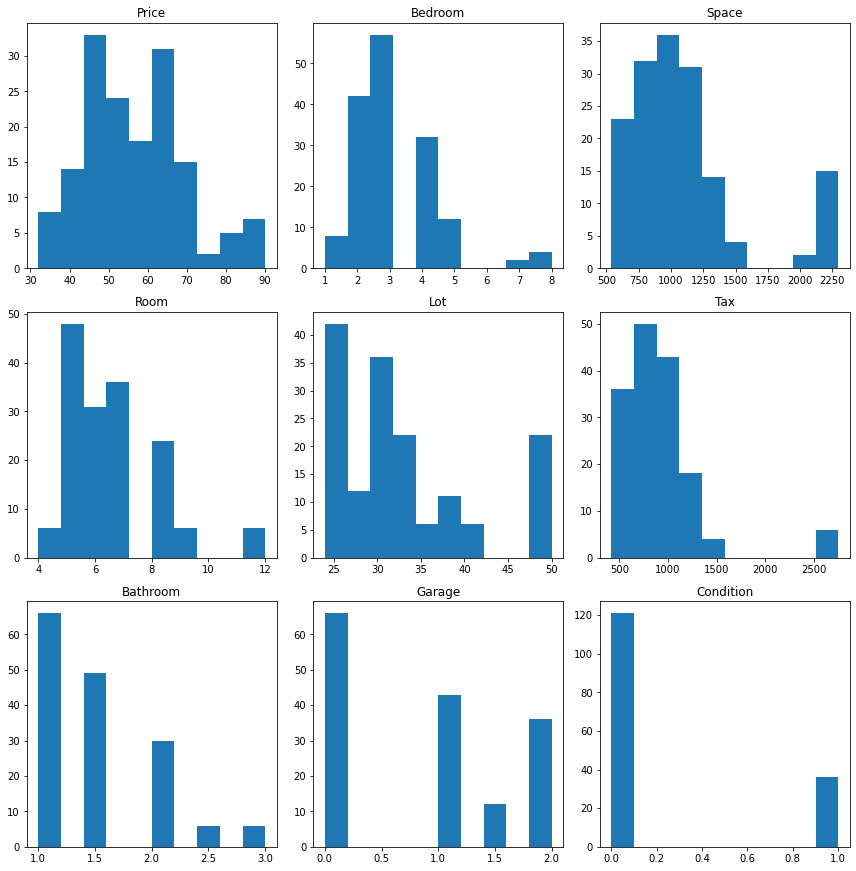

In [20]:
list_columns = list(df.columns)
plt.figure(figsize = (12,20))
for i in range(len(list_columns)):
    plt.subplot(5, 3, i + 1)
    plt.title(list_columns[i])
    plt.hist(df[list_columns[i]])
    
plt.tight_layout()

<AxesSubplot:>

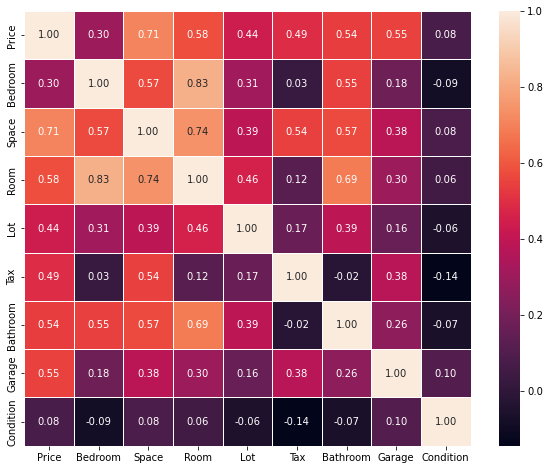

In [21]:
corr = df.corr()

plt.figure(figsize = (10, 8))
sns.heatmap(corr, annot = True, fmt = '.2f', linewidths = 0.5)

In [22]:
X = df.drop('Price', axis = 1)
y = df['Price']

In [23]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [24]:
rf = RandomForestRegressor(random_state = 0)

rf.fit(xtrain, ytrain)
pred_rf = rf.predict(xtest)

print('R2 Score: ', r2_score(ytest, pred_rf))
print("MSE: ", mean_squared_error(ytest, pred_rf))
print("MAE: ", mean_absolute_error(ytest, pred_rf))

R2 Score:  0.9134348820151146
MSE:  16.71213994596481
MAE:  3.0076923076923063


In [26]:
gb = GradientBoostingRegressor(random_state = 0)

gb.fit(xtrain, ytrain)
pred_gb = gb.predict(xtest)

print('R2 Score: ', r2_score(ytest, pred_gb))
print("MSE: ", mean_squared_error(ytest, pred_gb))
print("MAE: ", mean_absolute_error(ytest, pred_gb))

R2 Score:  0.9268849143382569
MSE:  14.11549561976691
MAE:  2.76654695370753


In [25]:
et = ExtraTreesRegressor(random_state = 0)

et.fit(xtrain, ytrain)
pred_et = et.predict(xtest)

print('R2 Score: ', r2_score(ytest, pred_et))
print("MSE: ", mean_squared_error(ytest, pred_et))
print("MAE: ", mean_absolute_error(ytest, pred_et))

R2 Score:  0.9666556282883835
MSE:  6.43741751212196
MAE:  1.8884375000000002
